In [1]:
import warnings; warnings.simplefilter('ignore')

import torch
import os
import time
import itertools
import collections
import torch.nn as nn
from cell import graph_utils, utils
from cell.Word2vec import prepare_vocab, dataloader, wv
from stellargraph import StellarGraph
from torch.nn import functional as F
from stellargraph.data import BiasedRandomWalk
import cell.BiasedDirectedWeightedWalk as BDWW
from stellargraph import StellarDiGraph
from IPython.display import Image
from numpy.random import multinomial
# from sklearn.metrics import ndcg_score, dcg_score




os.environ['KMP_DUPLICATE_LIB_OK']='True'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
import imp
from cell import  utils, analysis, plot_utils
from cell.Word2vec import prepare_vocab, dataloader, wv


imp.reload(utils)
imp.reload(analysis)

imp.reload(prepare_vocab)

<module 'cell.Word2vec.prepare_vocab' from '/Users/fahimehb/Documents/git-workspace/celltypes/cell/Word2vec/prepare_vocab.py'>

In [3]:
def preprocess_E_R(filepath, prefix_filename, embedding_size, window, lamda):
    E_path, R_path = utils.get_E_R_embedding_filepath(filepath,
                                                      prefix_filename,
                                                      embedding_size, 
                                                      window, 
                                                      lamda)
#     shifted_E, shifted_R = utils.shift_E_R_to_positive([E_path, R_path])
#     normalized_shifted_E = utils.normalized_each_row_by_rowsum(shifted_E)
#     normalized_shifted_R = utils.normalized_each_row_by_rowsum(shifted_R)
    
    return shifted_E, shifted_R

In [518]:
def plot_nandcg(adj, similarity, figsize, n_k):
    
    fig = plt.figure(figsize=figsize)

    nandcg = []
    for n in range(1, n_k):
        nandcg.append(analysis.nandcg_score_at_k(similarity, np.array(adj), k=n))
            
    ax = fig.add_subplot(111)
    ax.scatter(range(1,n_k),nandcg)
    ax.plot(range(1,n_k),nandcg)
    ax.set_xlabel("rank")
    ax.set_ylabel("nandcg")
    plt.show()

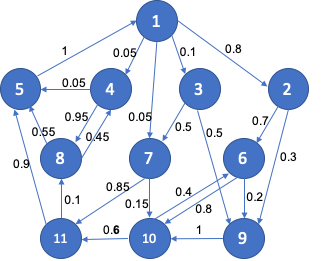

In [493]:
Image("/Users/fahimehb/Documents/NPP_GNN_project/code/directed_weighted_footbal_4_3_3_v2.png", width=250, height=50)

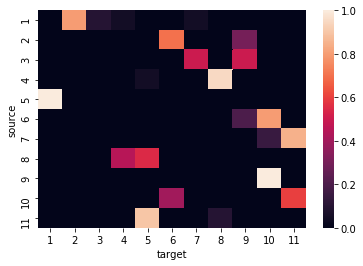

In [373]:
edges = pd.DataFrame([['1', '2', 0.8],
                      ['1', '3', 0.1],
                      ['1', '4', 0.05],
                      ['1', '7', 0.05],
                      ['2', '6', 0.7], 
                      ['2', '9', 0.3],
                      ['3', '9', 0.5],
                      ['3', '7', 0.5], 
                      ['4', '8', 0.95], 
                      ['4', '5', 0.05],
                      ['5', '1', 1], 
                      ['6', '9', 0.2], 
                      ['6', '10', 0.8],
                      ['7', '10', 0.15], 
                      ['7', '11', 0.85],
                      ['8', '5', 0.55],
                      ['8', '4', 0.45],
                      ['9', '10', 1], 
                      ['10', '11', 0.6], 
                      ['10', '6', 0.4],
                      ['11', '8', 0.1],
                      ['11', '5', 0.9]], columns=['source', 'target', 'weight'])

weight_mat = graph_utils.return_weight_mat_from_edgelist(edges, directed=True)
weight_mat = weight_mat.loc[[str(i) for i in range(1,12)]][[str(i) for i in range(1,12)]]
sns.heatmap(weight_mat)

In [374]:
weight_mat

target,1,2,3,4,5,6,7,8,9,10,11
source,,,,,,,,,,,
1,0.0,0.8,0.1,0.05,0.00,0.0,0.05,0.00,0.0,0.00,0.00
2,0.0,0.0,0.0,0.00,0.00,0.7,0.00,0.00,0.3,0.00,0.00
3,0.0,0.0,0.0,0.00,0.00,0.0,0.50,0.00,0.5,0.00,0.00
4,0.0,0.0,0.0,0.00,0.05,0.0,0.00,0.95,0.0,0.00,0.00
5,1.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00
6,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.2,0.80,0.00
7,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.15,0.85
8,0.0,0.0,0.0,0.45,0.55,0.0,0.00,0.00,0.0,0.00,0.00
9,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,1.00,0.00


We performed, weighted directed walks from each node of the graph. From each node, 100 walks was initiated and the length of each walk was 100 steps. This walks were used to create a inputs to each arm of the following model:

In [7]:
walks = utils.read_list_of_lists_from_csv("/Users/fahimehb/Documents/NPP_GNN_project/dat/walk_weighted_directed_footbal_v2.csv")

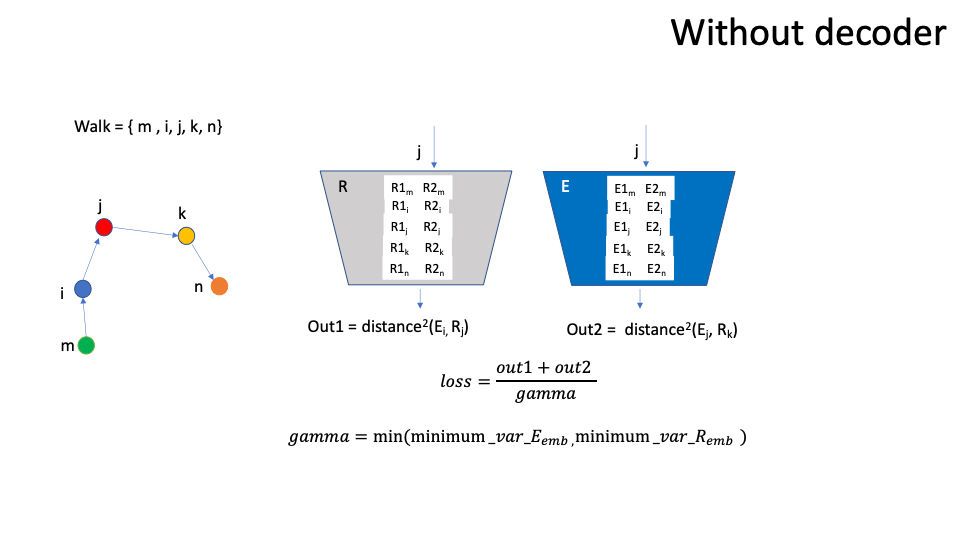

In [8]:
Image("/Users/fahimehb/Documents/NPP_GNN_project/code/Encoder_only_model.png", width=1000, height=150)

We performed multiple different runs with different parameters. The following parameters were examined:
window size for choosing nodes before or after a certain node: w = {1, 2, 3}
embedding size: e:{2, 3, 5, 10}

In the following we will present the results of changing the above-mentioned parameters on the model accuracy. 

# Node averaged normalized discounted cumulative gain
### As a function of w(window) and embedding size

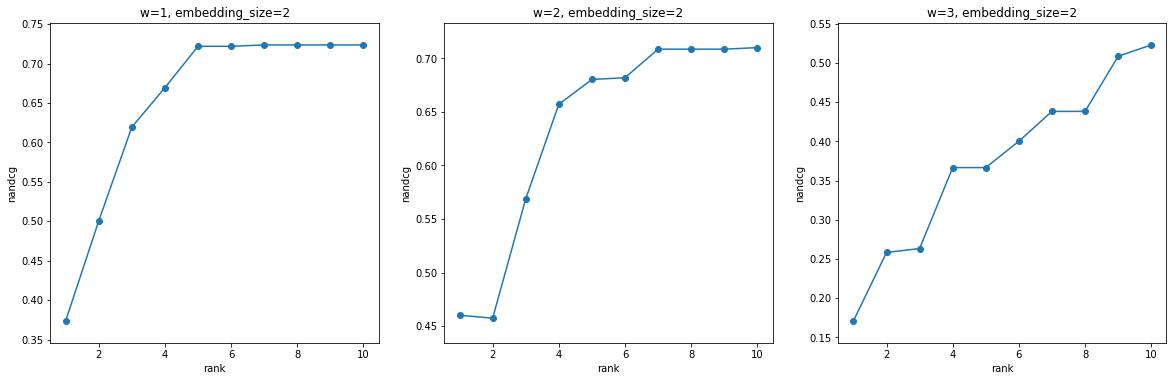

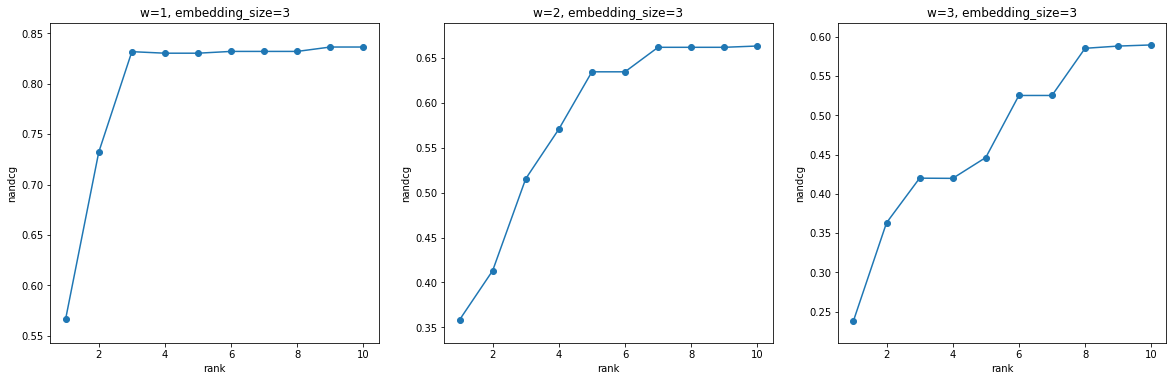

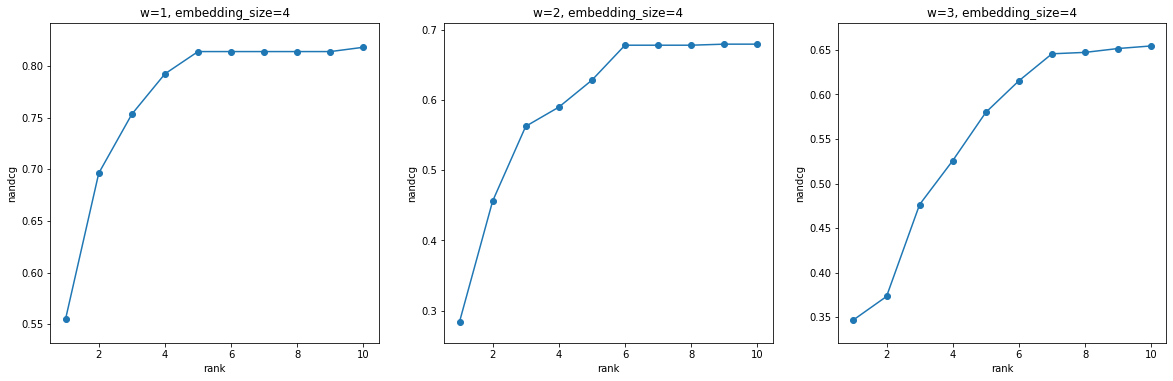

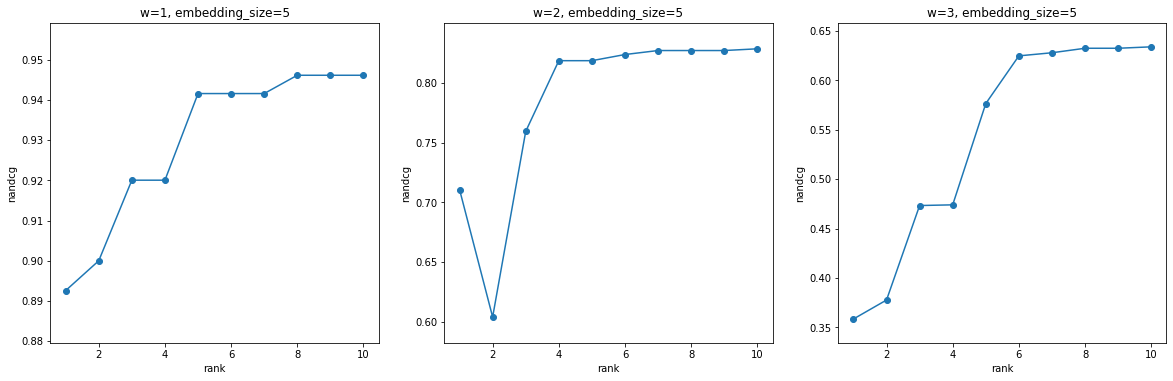

In [495]:
for embedding_size in [2, 3, 4, 5]:
    plot_nandcg_grid(filepath="/Users/fahimehb/Documents/NPP_GNN_project/dat/",
                     prefix_filename=None,
                     figsize=(20,20), 
                     w_list=[1,2,3], 
                     weight_mat=weight_mat, 
                     n_k=11, 
                     plot_dim=embedding_size)

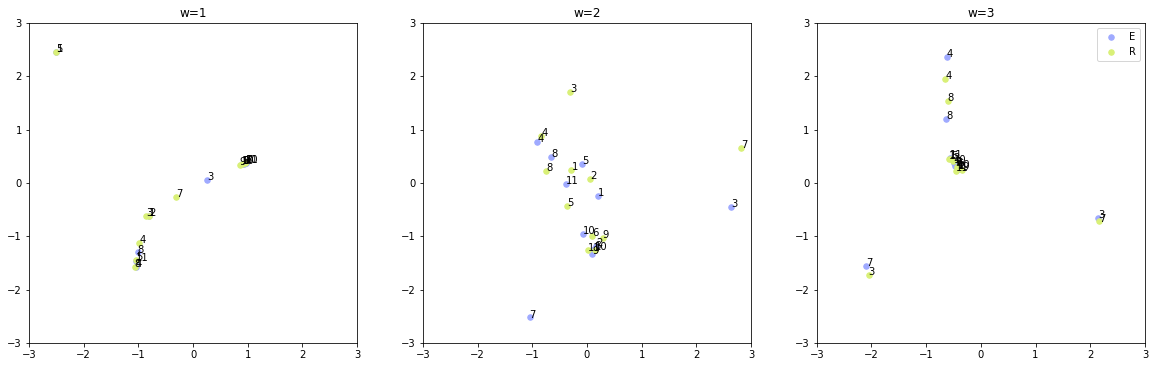

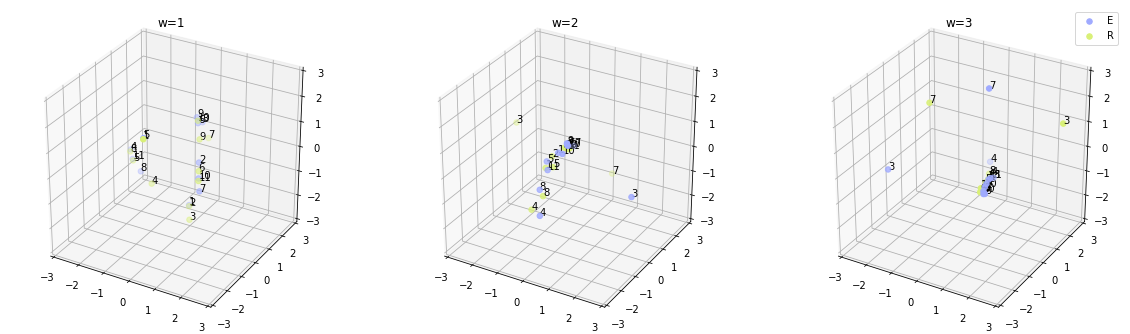

In [525]:
for embedding_size in [2, 3]:
    plot_grid(filepath="/Users/fahimehb/Documents/NPP_GNN_project/dat/", 
              prefix_filename=None,
              figsize=(20,20), 
              w_list=[1,2,3],
              plot_dim=embedding_size, 
              annotation=True, 
              E_color='#9FAAFF', 
              R_color='#D9F077', 
              E_marker='o', 
              R_marker='o')

In [527]:
E = pd.read_csv("/Users/fahimehb/Documents/NPP_GNN_project/dat/E_w1_2d.csv", index_col="Unnamed: 0")
E.index = ["E"+str(i) for i in E.index.tolist()]
R = pd.read_csv("/Users/fahimehb/Documents/NPP_GNN_project/dat/R_w1_2d.csv", index_col="Unnamed: 0")
R.index = ["R"+str(i) for i in R.index.tolist()]

data = pd.concat((E,R))
analysis.get_closest_nodes(emb=data, index=data.index.tolist(), node="E3", topn=10)

E3     0.000000
R7     0.648229
R9     0.656551
E6     0.697966
R10    0.707862
E9     0.708589
E2     0.731521
R6     0.762750
E10    0.778046
E7     0.778229
Name: E3, dtype: float64

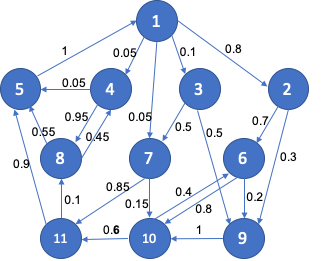

In [87]:
Image("/Users/fahimehb/Documents/NPP_GNN_project/code/directed_weighted_footbal_4_3_3_v2.png", width=400, height=50)

In [528]:
E_path, R_path = utils.get_E_R_embedding_filepath(filepath="/Users/fahimehb/Documents/NPP_GNN_project/dat/",
                                                  prefix_filename=None,
                                                  embedding_size=2, 
                                                  window=1, 
                                                  lamda=0.5)
E = pd.read_csv(E_path, index_col="Unnamed: 0")
R = pd.read_csv(R_path, index_col="Unnamed: 0")


# shifted_E, shifted_R = preprocess_E_R(
#     filepath="/Users/fahimehb/Documents/NPP_GNN_project/dat/", 
#     prefix_filename="AE_NPP_BCE_", 
#     embedding_size=2, 
#     window=1, 
#     lamda=0.5)


shifted_E, shifted_R = analysis.summarize_walk_embedding_results(
    {"E": E, "R":R}, 
    index=E.index.tolist(),
    embedding_size=2, 
    cl_df=utils.read_visp_npp_cldf(), 
    desired_cols=["cluster_color"])

shifted_R = shifted_R.loc[[
    str(j) for j in np.sort([int(i) for i in shifted_R.index])]]
shifted_E = shifted_E.loc[[
    str(j) for j in np.sort([int(i) for i in shifted_E.index])]]

target,1,2,3,4,5,6,7,8,9,10,11
source,,,,,,,,,,,
1,0.0,0.8,0.1,0.05,0.00,0.0,0.05,0.00,0.0,0.00,0.00
2,0.0,0.0,0.0,0.00,0.00,0.7,0.00,0.00,0.3,0.00,0.00
3,0.0,0.0,0.0,0.00,0.00,0.0,0.50,0.00,0.5,0.00,0.00
4,0.0,0.0,0.0,0.00,0.05,0.0,0.00,0.95,0.0,0.00,0.00
5,1.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00
6,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.2,0.80,0.00
7,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.15,0.85
8,0.0,0.0,0.0,0.45,0.55,0.0,0.00,0.00,0.0,0.00,0.00
9,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,1.00,0.00


# NPP

In [483]:
colors = utils.read_visp_npp_cldf()['cluster_color'].tolist()
types = utils.read_visp_npp_cldf()['cluster_label'].tolist()
layers = utils.get_npp_visp_layers()
total_inter = np.zeros((93,93))

for layer in layers:
    path = utils.get_npp_visp_interaction_mat_path(layer)
    tmp_inter= pd.read_csv(path, index_col="Unnamed: 0")
    total_inter = total_inter + tmp_inter.values
    
adj = total_inter.astype(float)

Reading cldf from: //Users/fahimehb/Documents/NPP_GNN_project/dat/cl_df_VISp_annotation.csv
Reading cldf from: //Users/fahimehb/Documents/NPP_GNN_project/dat/cl_df_VISp_annotation.csv


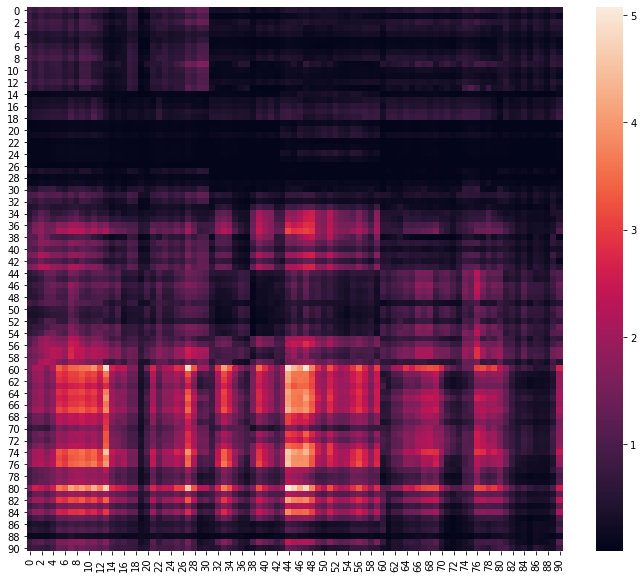

In [484]:
adj = np.delete(adj, [21, 32], axis=0)
adj = np.delete(adj, [21, 32], axis=1)
fig = plt.figure(figsize=(12,10))
sns.heatmap(adj)

We performed walk on this graph. From each node we start once and we walked 10000 steps

In [10]:
E_path, R_path = utils.get_E_R_embedding_filepath(filepath="/Users/fahimehb/Documents/NPP_GNN_project/dat/",
                                                  prefix_filename="AE_NPP_BCE_",
                                                  embedding_size=2, 
                                                  window=1, 
                                                  lamda=0.5)
E = pd.read_csv(E_path, index_col="Unnamed: 0")
R = pd.read_csv(R_path, index_col="Unnamed: 0")


# shifted_E, shifted_R = preprocess_E_R(
#     filepath="/Users/fahimehb/Documents/NPP_GNN_project/dat/", 
#     prefix_filename="AE_NPP_BCE_", 
#     embedding_size=2, 
#     window=1, 
#     lamda=0.5)


shifted_E, shifted_R = analysis.summarize_walk_embedding_results(
    {"E": E, "R":R}, 
    index=E.index.tolist(),
    embedding_size=2, 
    cl_df=utils.read_visp_npp_cldf(), 
    desired_cols=["cluster_color"])

shifted_R = shifted_R.loc[[
    str(j) for j in np.sort([int(i) for i in shifted_R.index])]]
shifted_E = shifted_E.loc[[
    str(j) for j in np.sort([int(i) for i in shifted_E.index])]]

/Users/fahimehb/Documents/NPP_GNN_project/dat/AE_NPP_BCE_lambda0.5_E_w1_2d.csv
/Users/fahimehb/Documents/NPP_GNN_project/dat/AE_NPP_BCE_lambda0.5_R_w1_2d.csv
Reading cldf from: //Users/fahimehb/Documents/NPP_GNN_project/dat/cl_df_VISp_annotation.csv


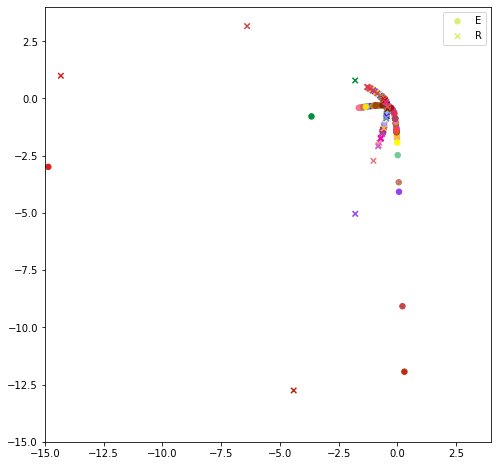

In [25]:
plot_utils.plot_ER(E=E_sh, 
             R=random_R ,
             figsize=(8,8), 
             plot_dim=2, 
             annotation=False, 
             E_color="Red", 
             R_color="Black", 
             E_marker='o', 
             R_marker='x', use_type_colors=True)

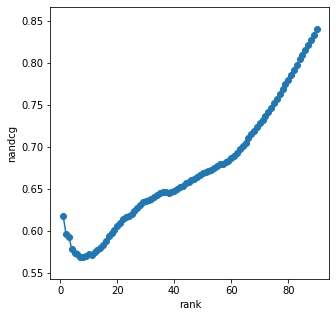

In [637]:
similarity = np.dot(shifted_E[["Z0", "Z1"]], shifted_R[["Z0", "Z1"]].T)
plot_nandcg(adj, similarity, figsize=(5,5), n_k=91)

In [622]:
# import random
# random_E = pd.DataFrame()
# random_R = pd.DataFrame()

# random_E['Z0'] = [random.uniform(1, 300) for i in range(91)]
# random_E['Z1'] = [random.uniform(1, 300) for i in range(91)]
# random_R['Z0'] = [random.uniform(1, 300) for i in range(91)]
# random_R['Z1'] = [random.uniform(1, 300) for i in range(91)]
# random_E.index.name = "cluster_id"
# random_E['cluster_color'] = shifted_E['cluster_color'].tolist()
# random_R.index.name = "cluster_id"
# random_R['cluster_color'] = shifted_R['cluster_color'].tolist()
# similarity=np.dot(random_E[["Z0", "Z1"]], random_R[["Z0", "Z1"]].T)

In [663]:
shifted_E, shifted_R = preprocess_E_R(
    filepath="/Users/fahimehb/Documents/NPP_GNN_project/dat/", 
    prefix_filename="AE_NPP_", 
    embedding_size=2, 
    window=2, 
    lamda=1.0)

shifted_E, shifted_R = analysis.summarize_walk_embedding_results(
    {"E": shifted_E, "R":shifted_R}, 
    index=shifted_E.index.tolist(),
    embedding_size=2, 
    cl_df=utils.read_visp_npp_cldf(), 
    desired_cols=["cluster_color", "cluster_label"])

/Users/fahimehb/Documents/NPP_GNN_project/dat/AE_NPP_lambda1.0_E_w2_2d.csv
/Users/fahimehb/Documents/NPP_GNN_project/dat/AE_NPP_lambda1.0_R_w2_2d.csv
Reading cldf from: //Users/fahimehb/Documents/NPP_GNN_project/dat/cl_df_VISp_annotation.csv


In [662]:
shifted_E.index = ["E_" + str(i) for i in shifted_E.cluster_label.tolist()]
shifted_R.index = ["R_" + str(i) for i in shifted_R.cluster_label.tolist()]

data = pd.concat((shifted_E[["Z0", "Z1"]],shifted_R[["Z0", "Z1"]]))
analysis.get_closest_nodes(emb=data, index=data.index.tolist(), node='E_Sst Chodl', topn=10)

E_Sst Chodl               0.000000
R_Sst Hpse Sema3c         5.542986
E_Pvalb Calb1 Sst        16.904830
R_Pvalb Reln Tac1        21.316693
R_Sst Chodl              22.559918
E_Lamp5 Lhx6             26.030025
R_Sst Mme Fam114a1       29.467140
R_Sst Hpse Cbln4         29.911889
R_Sncg Slc17a8           30.793225
E_L5 NP VISp Trhr Met    33.654361
Name: E_Sst Chodl, dtype: float64

In [675]:
tmp_adj = pd.DataFrame(adj, index=shifted_E.cluster_label.tolist(), columns=shifted_E.cluster_label.tolist())

In [680]:
tmp_adj.loc[['Sst Chodl']][dict([(r[0], list(tmp_adj.columns[np.argsort(list(r)[1: ])])) for r in list(tmp_adj.to_records())])['Sst Chodl']]

,Sst Myh8 Fibin,Sst Rxfp1 Prdm8,Pvalb Reln Itm2a,L6b VISp Mup5,Serpinf1 Clrn1,Lamp5 Fam19a1 Tmem182,L5 PT VISp C1ql2 Ptgfr,L6 IT VISp Col23a1 Adamts2,Vip Chat Htr1f,Serpinf1 Aqp5 Vip,...,L6b Col8a1 Rprm,L6 IT VISp Col18a1,L5 IT VISp Hsd11b1 Endou,L5 NP VISp Trhr Cpne7,Vip Lmo1 Myl1,L5 IT VISp Col27a1,L5 IT VISp Col6a1 Fezf2,Pvalb Th Sst,Vip Pygm C1ql1,L6 CT VISp Ctxn3 Sla
Sst Chodl,0.144115,0.175112,0.186844,0.191054,0.19948,0.201486,0.211637,0.230274,0.271388,0.273591,...,1.73587,1.744963,1.780668,1.839451,1.853644,2.055472,2.119705,2.29146,2.478975,2.559023


In [676]:
dict([(r[0], list(tmp_adj.columns[np.argsort(list(r)[1: ])])) for r in list(tmp_adj.to_records())])['Sst Chodl']

['Sst Myh8 Fibin',
 'Sst Rxfp1 Prdm8',
 'Pvalb Reln Itm2a',
 'L6b VISp Mup5',
 'Serpinf1 Clrn1',
 'Lamp5 Fam19a1 Tmem182',
 'L5 PT VISp C1ql2 Ptgfr',
 'L6 IT VISp Col23a1 Adamts2',
 'Vip Chat Htr1f',
 'Serpinf1 Aqp5 Vip',
 'Sst Hpse Cbln4',
 'Sst Crh 4930553C11Rik',
 'L2/3 IT VISp Agmat',
 'Sncg Gpr50',
 'L5 IT VISp Whrn Tox2',
 'Lamp5 Krt73',
 'Vip Ptprt Pkp2',
 'L6 IT VISp Car3',
 'L6b P2ry12',
 'Vip Igfbp4 Mab21l1',
 'L4 IT VISp Rspo1',
 'Sst Rxfp1 Eya1',
 'Pvalb Vipr2',
 'L6 IT VISp Penk Fst',
 'Sst Crhr2 Efemp1',
 'L5 PT VISp Chrna6',
 'L6 CT VISp Krt80 Sla',
 'Vip Igfbp6 Pltp',
 'Sst Tac2 Myh4',
 'Vip Col15a1 Pde1a',
 'L5 PT VISp Lgr5',
 'Pvalb Reln Tac1',
 'Vip Arhgap36 Hmcn1',
 'Vip Crispld2 Kcne4',
 'Vip Igfbp6 Car10',
 'Pvalb Tpbg',
 'Pvalb Akr1c18 Ntf3',
 'Vip Rspo4 Rxfp1 Chat',
 'L5 PT VISp C1ql2 Cdh13',
 'Sncg Vip Nptx2',
 'Lamp5 Ntn1 Npy2r',
 'L2/3 IT VISp Rrad',
 'Sncg Vip Itih5',
 'L5 IT VISp Batf3',
 'Sst Calb2 Necab1',
 'Lamp5 Fam19a1 Pax6',
 'L6 CT VISp Gpr139',
 'Ss

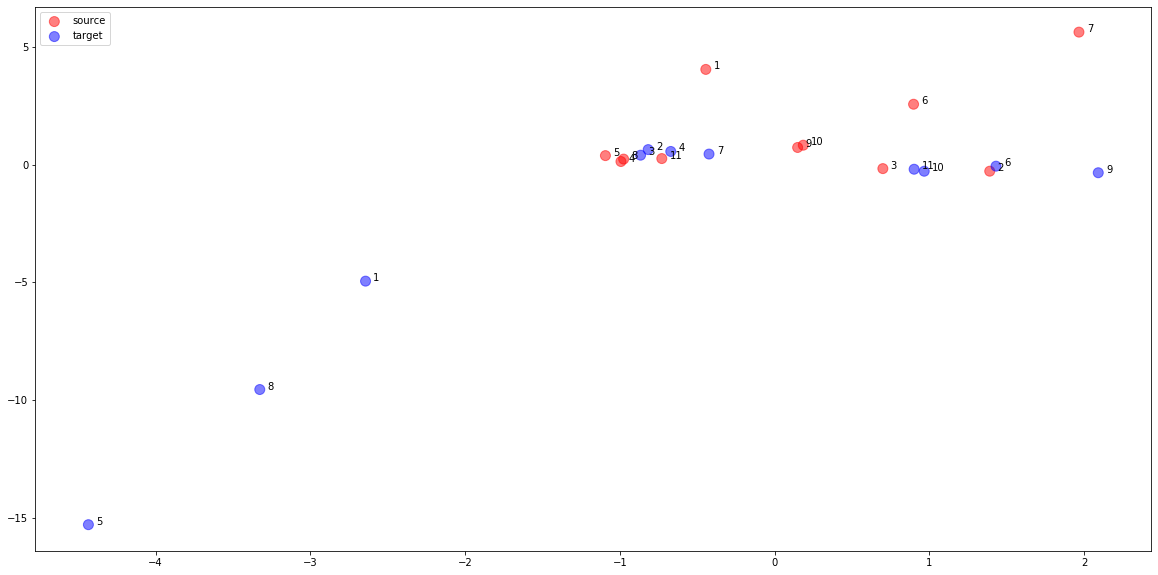

In [143]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.scatter(E[1], E[2], c=E['color'], label='source', s = 100, alpha =0.5)
ax.scatter(R[1], R[2], c=R['color'], label='target', s = 100, alpha = 0.5)
for j, txt in enumerate(emb.index.tolist()):
    ax.text(emb[1][j]+0.05, emb[2][j], txt, size=10)
ax.legend()

In [251]:
path_to_walk = "/Users/fahimehb/Documents/NPP_GNN_project/dat/walk_weighted_directed_footbal_v2.csv"
corpus= utils.read_list_of_lists_from_csv(path_to_walk)

In [214]:
true_relevance = np.asarray([[10, 0, 0, 1, 5]])
scores = np.asarray([[.05, 1.1, 1., .5, .0]])


ndcg_score(true_relevance, scores, k=None)

0.493680191377376